En este ejemplo, se toma iris Dataset. En Python, existe una clase de mezcla gaussiana para implementar GMM. Cargue el conjunto de datos de iris del paquete de conjuntos de datos. Para simplificar las cosas, tome las dos primeras columnas (es decir, la longitud y el ancho del sépalo, respectivamente). Ahora trace el conjunto de datos.

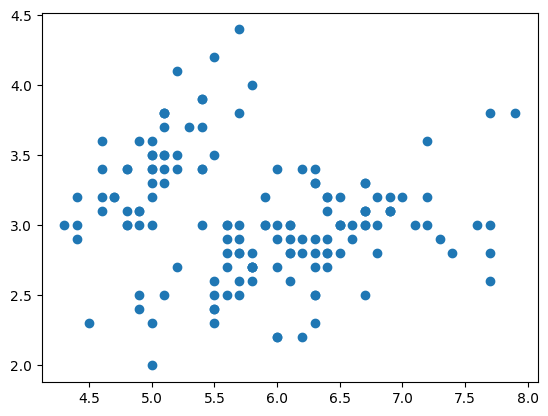

In [8]:
import os
import numpy as np
from joblib import Parallel, delayed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture


# load the iris dataset
iris = datasets.load_iris()
 
# select first two columns 
X = iris.data[:, :2]
 
# turn it into a dataframe
d = pd.DataFrame(X)
 
# plot the data
plt.scatter(d[0], d[1])
plt.show()


Ahora ajuste los datos como una mezcla de 3 gaussianos. Luego haga la agrupación, es decir, asigne una etiqueta a cada observación. Además, encuentre el número de iteraciones necesarias para que la función de log-verosimilitud converja y el valor de log-verosimilitud convergente.

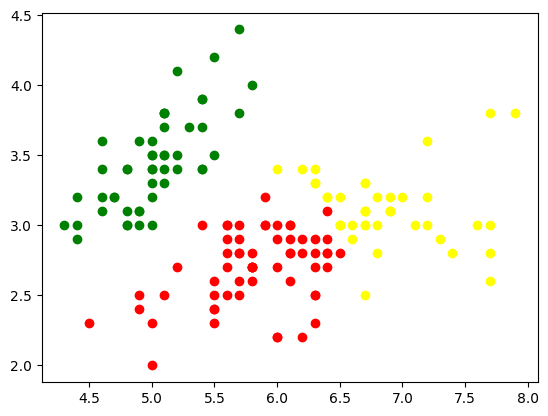

In [9]:
gmm = GaussianMixture(n_components = 3)

# Fit the GMM model for the dataset 
# which expresses the dataset as a 
# mixture of 3 Gaussian Distribution
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()


Imprima el valor de probabilidad logarítmica convergente y no. de iteraciones necesarias para que el modelo converja

In [10]:
# print the converged log-likelihood value
print(gmm.lower_bound_)

# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)


-1.4985672470486968
8


Por lo tanto, se necesitaron 7 iteraciones para que la probabilidad logarítmica convergiera. Si se realizan más iteraciones, no se puede observar ningún cambio apreciable en el valor de probabilidad logarítmica.

In [11]:
import os
import numpy as np
from joblib import Parallel, delayed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture


# Lista para almacenar los DataFrames de cada archivo
dataframes = []

# Directorio que contiene los archivos CSV
directory = "PRSA_Data_20130301-20170228"  # Reemplaza con la ruta correcta de tu directorio

# Iterar sobre cada archivo en el directorio
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Construir la ruta completa del archivo
        file_path = os.path.join(directory, filename)
        
        # Cargar el DataFrame desde el archivo CSV
        df = pd.read_csv(file_path)
        
        # Añadir el DataFrame a la lista
        dataframes.append(df)

# Combinar todos los DataFrames en uno solo
data = pd.concat(dataframes, ignore_index=True)

# Asegurarse de que la columna de fecha sea de tipo datetime
data['fecha'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data = data.set_index('fecha')

# Visualizar las primeras filas del conjunto de datos combinado
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
fecha,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [12]:
# Explorar la información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [27]:
# Seleccionar variables relevantes
data_clustering = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']]

# Limpiar datos (eliminar filas con valores faltantes y outliers)
data_cleaned = data_clustering.dropna()

# Eliminar valores negativos de PM2.5 (si es necesario)
data_cleaned = data_cleaned[data_cleaned['PM2.5'] >= 0]

# Manejar outliers usando Elliptic Envelope
outlier_detector = EllipticEnvelope(contamination=0.05)
outliers = outlier_detector.fit_predict(data_cleaned.drop(columns=['station', 'wd']))
data_cleaned = data_cleaned[outliers == 1]

NameError: name 'EllipticEnvelope' is not defined